In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
!pip install ipdb
import ipdb

In [33]:
# 1. (a) Display image with correct colors
def part_1a(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,6))
    plt.imshow(img_rgb)
    plt.title("Original Image (Correct Colors)")
    plt.axis('off')
    plt.show()

In [34]:
# 1. (b) Image cropping
def part_1b(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Crop coordinates (adjust based on your image)
    y1, y2 = 100, 370
    x1, x2 = 350, 550
    cropped = img_rgb[y1:y2, x1:x2]

    plt.imshow(cropped)
    plt.title("Cropped Region")
    plt.axis('off')
    plt.show()

In [35]:
# 1. (c) Image downsampling
def part_1c(img_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Downsample by 10x
    downsampled = cv2.resize(img, (w//10, h//10),
                            interpolation=cv2.INTER_AREA)

    plt.imshow(cv2.cvtColor(downsampled, cv2.COLOR_BGR2RGB))
    plt.title("Downsampled Image (10x)")
    plt.axis('off')
    plt.show()

    return downsampled

In [36]:
# 1. (d) Upsampling with different methods
def part_1d(downsampled, original_shape):
    # Nearest neighbor interpolation
    up_nearest = cv2.resize(downsampled, (original_shape[1], original_shape[0]),
                           interpolation=cv2.INTER_NEAREST)

    # Bicubic interpolation
    up_bicubic = cv2.resize(downsampled, (original_shape[1], original_shape[0]),
                          interpolation=cv2.INTER_CUBIC)

    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.imshow(cv2.cvtColor(up_nearest, cv2.COLOR_BGR2RGB))
    ax1.set_title("Nearest Neighbor")
    ax1.axis('off')

    ax2.imshow(cv2.cvtColor(up_bicubic, cv2.COLOR_BGR2RGB))
    ax2.set_title("Bicubic")
    ax2.axis('off')

    plt.show()

    return up_nearest, up_bicubic

In [37]:
# 1. (e) Error calculation
def part_1e(original, up1, up2):
    # Convert to grayscale for error calculation
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    up1_gray = cv2.cvtColor(up1, cv2.COLOR_BGR2GRAY)
    up2_gray = cv2.cvtColor(up2, cv2.COLOR_BGR2GRAY)

    # Calculate absolute differences
    diff_nearest = cv2.absdiff(original_gray, up1_gray)
    diff_bicubic = cv2.absdiff(original_gray, up2_gray)

    # Sum of differences
    error_nearest = np.sum(diff_nearest)
    error_bicubic = np.sum(diff_bicubic)

    # Display difference images
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.imshow(diff_nearest, cmap='gray')
    plt.title(f"Nearest Neighbor Error: {error_nearest}")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(diff_bicubic, cmap='gray')
    plt.title(f"Bicubic Error: {error_bicubic}")
    plt.axis('off')

    plt.show()

In [38]:
# 3. (a) Greyscale
def part_3a(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude = np.abs(f_shift)
    phase = np.angle(f_shift)
    plt.figure(figsize=(12, 6))

    # Original grayscale image
    plt.subplot(1, 3, 1)
    plt.title("Grayscale Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Magnitude spectrum (log-scaled for better visualization)
    plt.subplot(1, 3, 2)
    plt.title("Magnitude Spectrum")
    plt.imshow(np.log(1 + magnitude), cmap='gray')
    plt.axis('off')

    # Phase spectrum
    plt.subplot(1, 3, 3)
    plt.title("Phase Spectrum")
    plt.imshow(phase, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [39]:
# 3. (b) High-pass and Low-pass Filtr
def part_3b(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude = np.log(1 + np.abs(f_shift))
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # Low-pass filter
    low_pass_mask = np.zeros((rows, cols), np.uint8)
    radius = 50  # Radius of the low-pass filter
    cv2.circle(low_pass_mask, (ccol, crow), radius, 1, thickness=-1)

    # High-pass filter
    high_pass_mask = np.ones((rows, cols), np.uint8)
    cv2.circle(high_pass_mask, (ccol, crow), radius, 0, thickness=-1)

    # Diagonal band-pass filter
    diagonal_band_mask = np.zeros((rows, cols), np.uint8)
    for i in range(-radius, radius):
        diagonal_band_mask[crow + i, ccol + i] = 1
        diagonal_band_mask[crow - i, ccol + i] = 1

    # Step 5: Apply filters
    low_pass_filtered = f_shift * low_pass_mask
    high_pass_filtered = f_shift * high_pass_mask
    diagonal_band_filtered = f_shift * diagonal_band_mask

    # Inverse Fourier Transform
    low_pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(low_pass_filtered)))
    high_pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(high_pass_filtered)))
    diagonal_band_image = np.abs(np.fft.ifft2(np.fft.ifftshift(diagonal_band_filtered)))

    # Step 6: Visualize results
    plt.figure(figsize=(15, 10))

    # Original magnitude spectrum
    # plt.subplot(3, 4, 1)
    # plt.title("Original Magnitude Spectrum")
    # plt.imshow(magnitude, cmap='gray')
    # plt.axis('off')

    # Low-pass filter
    plt.subplot(3, 4, 1)
    plt.title("Low-pass Filter Mask")
    plt.imshow(low_pass_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.title("Low-pass Magnitude Spectrum")
    plt.imshow(np.log(1 + np.abs(low_pass_filtered)), cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.title("Low-pass Filtered Image")
    plt.imshow(low_pass_image, cmap='gray')
    plt.axis('off')

    # High-pass filter
    plt.subplot(3, 4, 5)
    plt.title("High-pass Filter Mask")
    plt.imshow(high_pass_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.title("High-pass Magnitude Spectrum")
    plt.imshow(np.log(1 + np.abs(high_pass_filtered)), cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.title("High-pass Filtered Image")
    plt.imshow(high_pass_image, cmap='gray')
    plt.axis('off')

    # Diagonal band-pass filter
    plt.subplot(3, 4, 9)
    plt.title("Diagonal Band-pass Filter Mask")
    plt.imshow(diagonal_band_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.title("Diagonal Band-pass Magnitude Spectrum")
    plt.imshow(np.log(1 + np.abs(diagonal_band_filtered)), cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 11)
    plt.title("Diagonal Band-pass Filtered Image")
    plt.imshow(diagonal_band_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [40]:
# 3. (c) Phase Swapping
def part_3c(img_path_1, img_path_2):
    # Step 1: Read two images and convert them to grayscale
    image1 = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img_path_2, cv2.IMREAD_GRAYSCALE)

    # Resize image2 to the size of image1
    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Step 2: Compute the Fourier Transforms
    f_transform1 = np.fft.fft2(image1)
    f_transform2 = np.fft.fft2(image2_resized)

    # Step 3: Shift the zero frequency component to the center
    f_shift1 = np.fft.fftshift(f_transform1)
    f_shift2 = np.fft.fftshift(f_transform2)

    # Step 4: Compute the magnitude and phase
    magnitude1 = np.abs(f_shift1)
    magnitude2 = np.abs(f_shift2)
    phase1 = np.angle(f_shift1)
    phase2 = np.angle(f_shift2)

    # Step 5: Swap the phases
    f_shift_swapped = magnitude1 * np.exp(1j * phase2)  # Swap phase1 with phase2

    # Step 6: Inverse Fourier Transform to reconstruct the image
    image_reconstructed1 = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_swapped)))

    # Step 7: Visualize the results
    plt.figure(figsize=(15, 10))

    # Original images and their Fourier magnitudes
    plt.subplot(3, 4, 1)
    plt.title("Original Image 1")
    plt.imshow(image1, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.title("Magnitude Spectrum of Image 1")
    plt.imshow(np.log(1 + magnitude1), cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.title("Phase Spectrum of Image 1")
    plt.imshow(phase1, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.title("Original Image 2")
    plt.imshow(image2_resized, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 5)
    plt.title("Magnitude Spectrum of Image 2")
    plt.imshow(np.log(1 + magnitude2), cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.title("Phase Spectrum of Image 2")
    plt.imshow(phase2, cmap='gray')
    plt.axis('off')

    # Reconstructed image after phase swapping
    plt.subplot(3, 4, 7)
    plt.title("Reconstructed Image after Phase Swapping")
    plt.imshow(image_reconstructed1, cmap='gray')
    plt.axis('off')

    # Try modifying the phase differently, for example, by shifting the phase
    shifted_phase = np.roll(phase1, 50, axis=0)  # Shift phase by 50 pixels along axis 0
    f_shift_shifted = magnitude1 * np.exp(1j * shifted_phase)
    image_reconstructed_shifted = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_shifted)))

    plt.subplot(3, 4, 8)
    plt.title("Reconstructed Image with Shifted Phase")
    plt.imshow(image_reconstructed_shifted, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [41]:
# 3. (d) Hybrid Images
def part_3d(img_path_1, img_path_2):
    # Step 1: Read two images and convert them to grayscale
    image1 = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img_path_2, cv2.IMREAD_GRAYSCALE)

    # Resize images to be the same size
    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Step 2: Compute the Fourier Transforms of both images
    f_transform1 = np.fft.fft2(image1)
    f_transform2 = np.fft.fft2(image2_resized)

    # Shift the zero-frequency component to the center
    f_shift1 = np.fft.fftshift(f_transform1)
    f_shift2 = np.fft.fftshift(f_transform2)

    # Step 3: Create low-pass and high-pass filters
    rows, cols = image1.shape
    crow, ccol = rows // 2, cols // 2  # center of the image

    # Low-pass filter
    low_pass_filter = np.zeros((rows, cols))
    r_low = 40  # radius of the low-pass filter
    cv2.circle(low_pass_filter, (ccol, crow), r_low, 1, thickness=-1)

    # High-pass filter (complement of low-pass filter)
    high_pass_filter = np.ones((rows, cols))
    cv2.circle(high_pass_filter, (ccol, crow), r_low, 0, thickness=-1)

    # Step 4: Apply filters
    f_shift1_low = f_shift1 * low_pass_filter  # Low-frequency part of image 1
    f_shift2_high = f_shift2 * high_pass_filter  # High-frequency part of image 2

    # Step 5: Combine the low and high frequencies
    f_shift_combined = f_shift1_low + f_shift2_high

    # Step 6: Inverse Fourier Transform to get the hybrid image
    hybrid_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_combined)))

    # Step 7: Display the results
    plt.figure(figsize=(10, 7))

    plt.subplot(1, 3, 1)
    plt.title("Image 1")
    plt.imshow(image1, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Image 2")
    plt.imshow(image2_resized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Hybrid Image")
    plt.imshow(hybrid_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


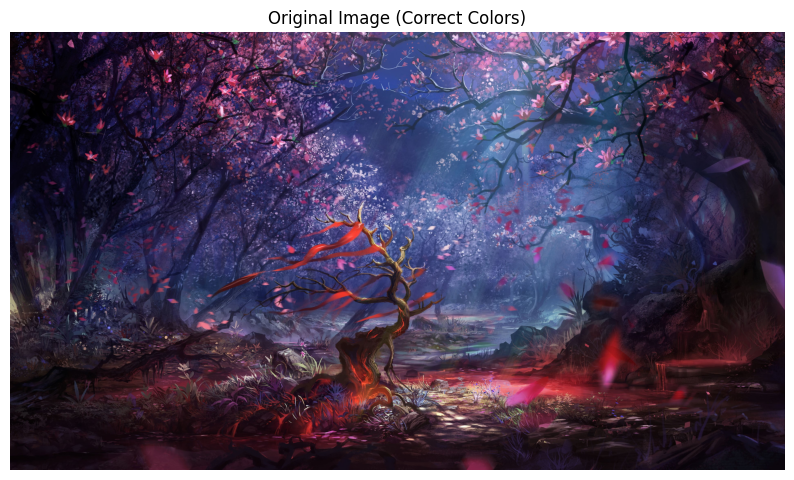

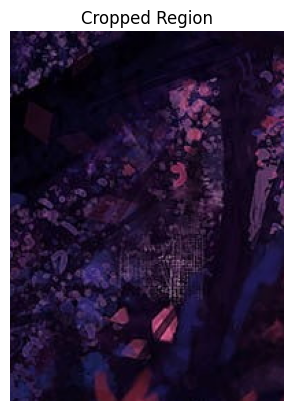

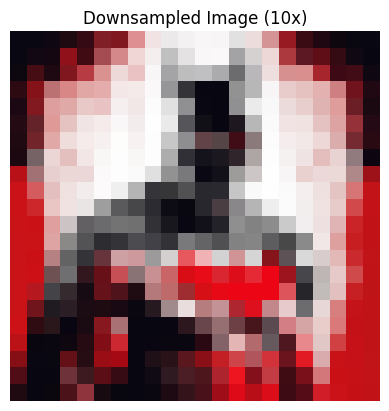

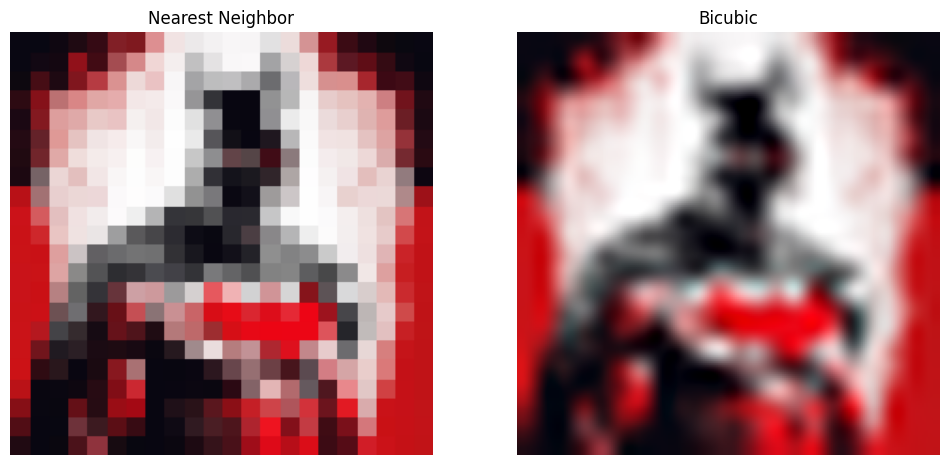

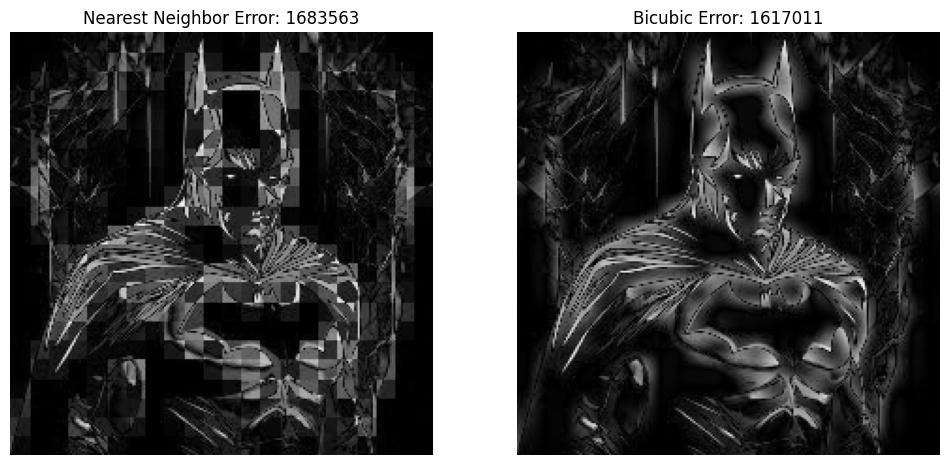

In [42]:
# Main execution
if __name__ == "__main__":
    img_path_1 = "q1.jpg"
    sample_img = "Q13.jpeg"
    img_path_3 = "Q3.jpeg"
    img_path_3_1 = "Q33.png"
    img_path_3_2 = "Q333.jpg"
    img_path_3_3 = "Q44.png"
    img_path_3_4 = "Q45.png"

    # Part 1 A
    part_1a(img_path_1)

    # Part 1 B
    part_1b(img_path_1)

    # Part 1 C
    original_img = cv2.imread(sample_img)
    downsampled = part_1c(sample_img)

    # Part 1 D
    up_nearest, up_bicubic = part_1d(downsampled, original_img.shape)

    # Part 1 E
    part_1e(original_img, up_nearest, up_bicubic)

    # Part 3 A
    #part_3a(img_path_3)

    # Part 3 B
    #part_3b(img_path_3)

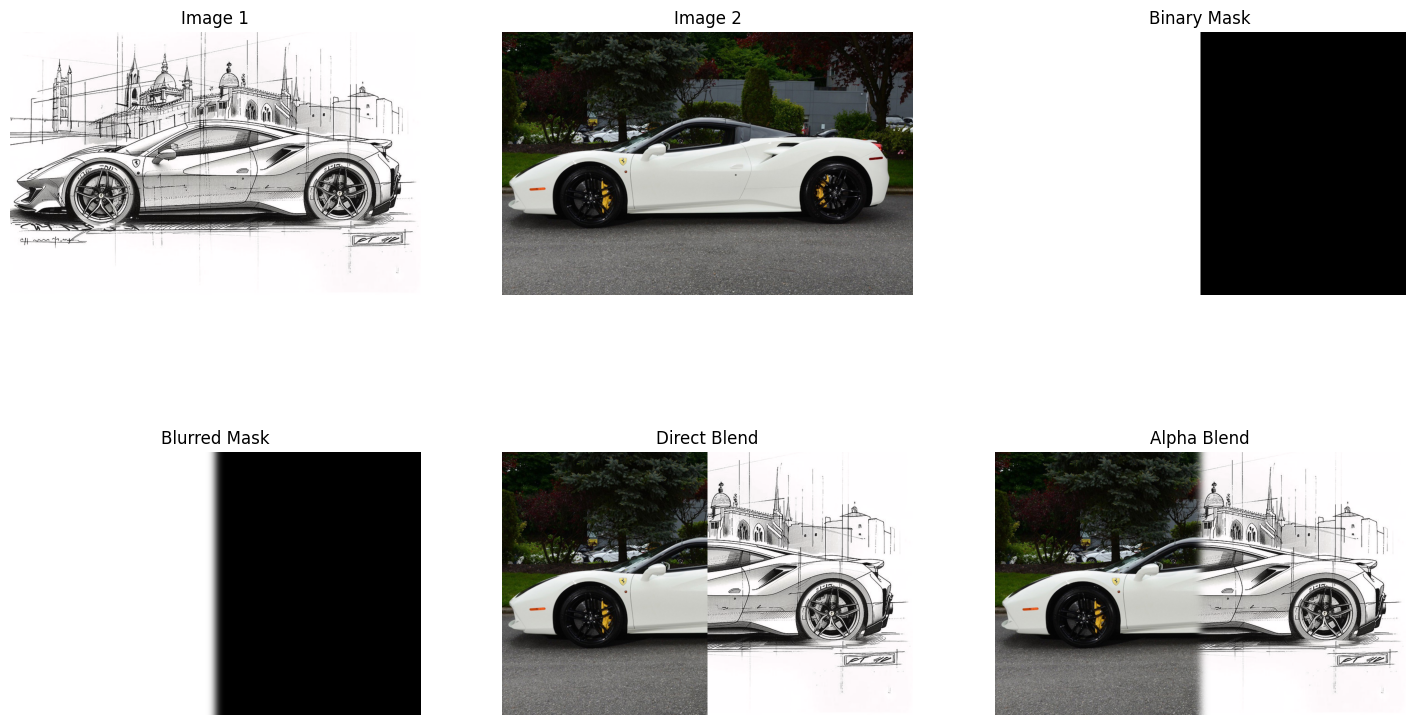

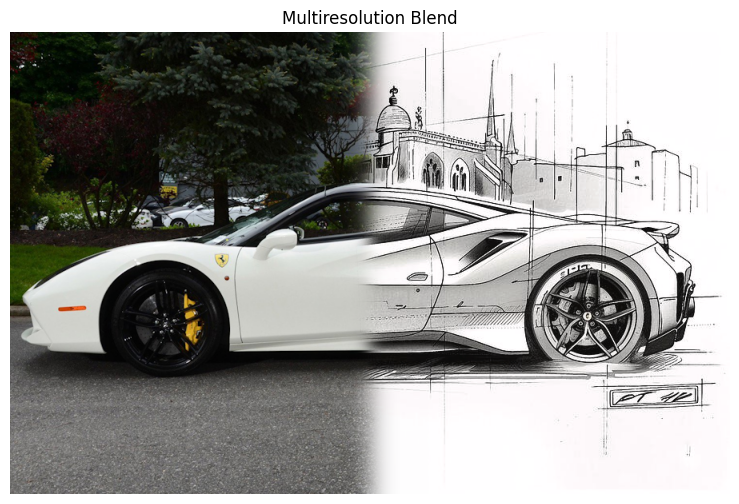

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def build_gaussian_pyramid(img, levels):
    """Construct Gaussian pyramid with exact size handling."""
    pyramid = [img.astype(np.float32)]
    for _ in range(levels-1):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid

def build_laplacian_pyramid(img, levels):
    """Build Laplacian pyramid with proper size reconstruction."""
    gaussian = build_gaussian_pyramid(img, levels)
    pyramid = []
    for i in range(levels-1):
        h, w = gaussian[i].shape[:2]
        up = cv2.pyrUp(gaussian[i+1], dstsize=(w, h))
        laplacian = gaussian[i] - up
        pyramid.append(laplacian)
    pyramid.append(gaussian[-1].copy())
    return pyramid

def collapse_pyramid(pyramid):
    """Collapse pyramid with precision size matching."""
    img = pyramid[-1]
    for i in range(len(pyramid)-2, -1, -1):
        h, w = pyramid[i].shape[:2]
        img = cv2.pyrUp(img, dstsize=(w, h))
        img += pyramid[i]
    return np.clip(img, 0, 255)

def multiblend(img1, img2, mask, levels=5):
    """Multiresolution blending using Gaussian and Laplacian pyramids."""
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    mask = mask.astype(np.float32) / 255.0

    # Dynamically choose pyramid depth based on image size
    min_dim = min(img1.shape[:2])
    levels = min(levels, int(np.log2(min_dim)) - 3)

    lp1 = build_laplacian_pyramid(img1, levels)
    lp2 = build_laplacian_pyramid(img2, levels)
    gm = build_gaussian_pyramid(mask, levels)

    blended = []
    for l1, l2, g in zip(lp1, lp2, gm):
        # Expand mask to match color channels if needed
        if len(g.shape) == 2 and len(l1.shape) == 3:
            g = np.repeat(g[:, :, np.newaxis], 3, axis=2)
        blended.append(l1 * (1 - g) + l2 * g)
    return collapse_pyramid(blended).astype(np.uint8)

# Load images
img1 = cv2.imread('Q44.png')
img2 = cv2.imread('Q45.png')
assert img1 is not None and img2 is not None, "Failed to load images"

# Resize images to the same dimensions
h, w = min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])
img1 = cv2.resize(img1, (w, h))
img2 = cv2.resize(img2, (w, h))

mask_binary = np.zeros((h, w), dtype=np.uint8)
mask_binary[:, :w//2] = 255

mask_blurred = cv2.GaussianBlur(mask_binary, (51, 51), 0)

mask_norm = mask_binary.astype(np.float32) / 255.0
direct = (1 - mask_norm)[..., np.newaxis] * img1.astype(np.float32) + mask_norm[..., np.newaxis] * img2.astype(np.float32)
direct = direct.astype(np.uint8)
batimg = cv2.GaussianBlur(direct, (5, 5), 0)

mask_blur_norm = mask_blurred.astype(np.float32) / 255.0
alpha = (1 - mask_blur_norm)[..., np.newaxis] * img1.astype(np.float32) + mask_blur_norm[..., np.newaxis] * img2.astype(np.float32)
alpha = alpha.astype(np.uint8)

multires = multiblend(img1, img2, mask_blurred, levels=5)

plt.figure(figsize=(18, 10))
plt.subplot(231), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Image 1'), plt.axis('off')
plt.subplot(232), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Image 2'), plt.axis('off')
plt.subplot(233), plt.imshow(mask_binary, cmap='gray'), plt.title('Binary Mask'), plt.axis('off')
plt.subplot(234), plt.imshow(mask_blurred, cmap='gray'), plt.title('Blurred Mask'), plt.axis('off')
plt.subplot(235), plt.imshow(cv2.cvtColor(direct, cv2.COLOR_BGR2RGB)), plt.title('Direct Blend'), plt.axis('off')
plt.subplot(236), plt.imshow(cv2.cvtColor(alpha, cv2.COLOR_BGR2RGB)), plt.title('Alpha Blend'), plt.axis('off')
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(multires, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Multiresolution Blend')
plt.axis('off')
plt.show()